In [109]:
import spacy #version 2.2.4
import scispacy
import medspacy
import en_ner_bc5cdr_md
from spacy import displacy
import pandas as pd
from spacy import displacy
import boto3
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import os
import numpy as np

In [91]:
"""Spacy"""
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bc5cdr_md-0.5.0.tar.gz

"""Scispacy"""
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bionlp13cg_md-0.4.0.tar.gz
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_lg-0.4.0.tar.gz

'Scispacy'

In [92]:
import en_core_sci_md
import en_ner_craft_md
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md
import en_core_sci_lg

In [93]:
# nlp_curr = en_core_sci_lg.load()

In [94]:
# for import_pckg in [en_ner_craft_md, en_ner_jnlpba_md]:
#     nlp_curr = en_ner_craft_md.load()

In [22]:
import boto3
import pandas as pd

# Define the S3 bucket and file details
bucket_name = 'aiforce-bucket'
note_file_name = 'NOTEEVENTS.csv'
diag_file_name = 'DIAGNOSES_ICD.csv'

# Initialize a session using boto3
s3 = boto3.client('s3')

# # Download the file from S3 to your SageMaker instance
# s3.download_file(bucket_name, note_file_name, note_file_name)
# s3.download_file(bucket_name, diag_file_name, diag_file_name)

# Load the CSV into a pandas DataFrame
notes = pd.read_csv(note_file_name)
diags = pd.read_csv(diag_file_name)

# # Display the first few rows of the DataFrame
# df.head()

In [25]:
import re
import pandas as pd

# Custom function for text preprocessing
def custom_preprocessing(text):
    # Remove any bracketed text (e.g., [**Name**], [**Date**], etc.)
    text = re.sub(r'\[\*\*.*?\*\*\]', '', text)
    
#     # Replace dates with a placeholder <DATE>
#     text = re.sub(r'\d{2,4}[-/]\d{2,4}[-/]\d{2,4}', '<DATE>', text)
    
#     # Replace SSNs with a placeholder <SSN>
#     text = re.sub(r'\b\d{3}-\d{2}-\d{4}\b


In [26]:
"""Filtering for pneumonia ICD code and where Category is Discharge summary"""
pneumonia_icd9 = '486' # pneumonia
pneumonia_diags = diags[diags['icd9_code'].str.startswith(pneumonia_icd9)]
pneumonia_notes = pd.merge(notes, pneumonia_diags, right_on='hadm_id', left_on='HADM_ID')
pneumonia_discharge_notes = pneumonia_notes[pneumonia_notes['CATEGORY'] == 'Discharge summary']

In [112]:
"""Function to extract entities using different models"""
def extract_entities(text, model):
    doc = model(text)
    entities = [ent.text for ent in doc.ents]  # Collect all entities
    return entities

In [111]:
"""Apply entity extraction to the preprocessed text for spacy model"""
nlp = spacy.load("en_ner_bc5cdr_md")  # Spacy model
pneumonia_discharge_notes['entities_spacy'] = pneumonia_discharge_notes['TEXT'].apply(lambda x: extract_entities(x, nlp))
pneumonia_discharge_notes.to_csv('spacy_df.csv', index=False)

In [100]:
"""View identified entities"""
displacy.render(nlp_spacy(pneumonia_discharge_notes['TEXT'].iloc[0]), style='ent')

In [106]:
"""Extracting entities using scispacy"""
for itr, scispacy_pckg in enumerate(scispacy_models):
    nlp_scispacy = scispacy_pckg.load()
    ent_name = 'entities_scispacy' + scispacy_pckg
    pneumonia_discharge_notes[ent_name] = pneumonia_discharge_notes['TEXT'].apply(lambda x: extract_entities(x, nlp_scispacy))
    pneumonia_discharge_notes.to_csv('scispacy_df' + str(itr) + '.csv', index=False)

In [108]:
"""Displaying results of scispacy models"""
model = en_ner_jnlpba_md.load()
displacy.render(model(pneumonia_discharge_notes['TEXT'].iloc[0]), style='ent')

In [102]:
"""Extracting entities for medspacy"""
nlp = spacy.load("en_ner_bc5cdr_md")  # Spacy model
nlp_medspacy = medspacy.load(nlp)
pneumonia_discharge_notes['entities_medspacy'] = pneumonia_discharge_notes['TEXT'].apply(lambda x: extract_entities(x, nlp_medspacy))
pneumonia_discharge_notes.to_csv('medspacy_df.csv', index=False)

In [103]:
"""Displaying results for medspacy"""
displacy.render(nlp_medspacy(pneumonia_discharge_notes['TEXT'].iloc[0]), style='ent')

In [83]:
"""Loading entity dataframes saved to expedite """
spacy_df = pd.read_csv('spacy_df.csv')
medspacy_df = pd.read_csv('medspacy_df.csv')
scispacy_df_core_sci_md = pd.read_csv('scispacy_df0.csv')
scispacy_df_ner_craft_md = pd.read_csv('scispacy_df1.csv')
scispacy_df_ner_jnlpba_md = pd.read_csv('scispacy_df2.csv')
scispacy_df_ner_bc5cdr_md = pd.read_csv('scispacy_df3.csv')
scispacy_df_ner_bionlp13cg_md = pd.read_csv('scispacy_df4.csv')
scispacy_df_core_sci_lg = pd.read_csv('scispacy_df5.csv')

entity_dfs = [spacy_df, medspacy_df, scispacy_df_core_sci_md, scispacy_df_ner_craft_md, scispacy_df_ner_jnlpba_md,
             scispacy_df_ner_bc5cdr_md, scispacy_df_ner_bionlp13cg_md, scispacy_df_core_sci_lg]

entity_names = ['spacy', 'medspacy', 'scispacy_df_core_sci_md', 'scispacy_df_ner_craft_md', 'scispacy_df_ner_jnlpba_md',
                'scispacy_df_ner_bc5cdr_md', 'scispacy_df_ner_bionlp13cg_md', 'scispacy_df_core_sci_lg']

In [76]:
from gensim.models import Word2Vec

# Word2Vec model
def run_word2vec(entities, model_name):
    tokenized_entities = [str(entity).split() for entity in entities]  
    w2v_model = Word2Vec(sentences=tokenized_entities, vector_size=100, window=5, min_count=1, workers=4)
    
    if not os.path.exists('./models/'):
        os.mkdir('./models/')
    
    # Save the model (optional)
    w2v_model.save('./models/' + model_name)
    word_vectors = w2v_model.wv

    return word_vectors
    
"""Example: Getting word vectors"""
word_vector_dict = {ename: '' for ename in entity_names}

for entity, entity_name in zip(entity_dfs, entity_names):
    ec_end = '_'.join(entity_name.split('_')[-2:])
    entity_col_name =  [col for col in entity.columns if ec_end in col][0]
#     print(entity_col_name)
    word_vector_dict[entity_name] = run_word2vec(entity[entity_col_name], entity_name)
    


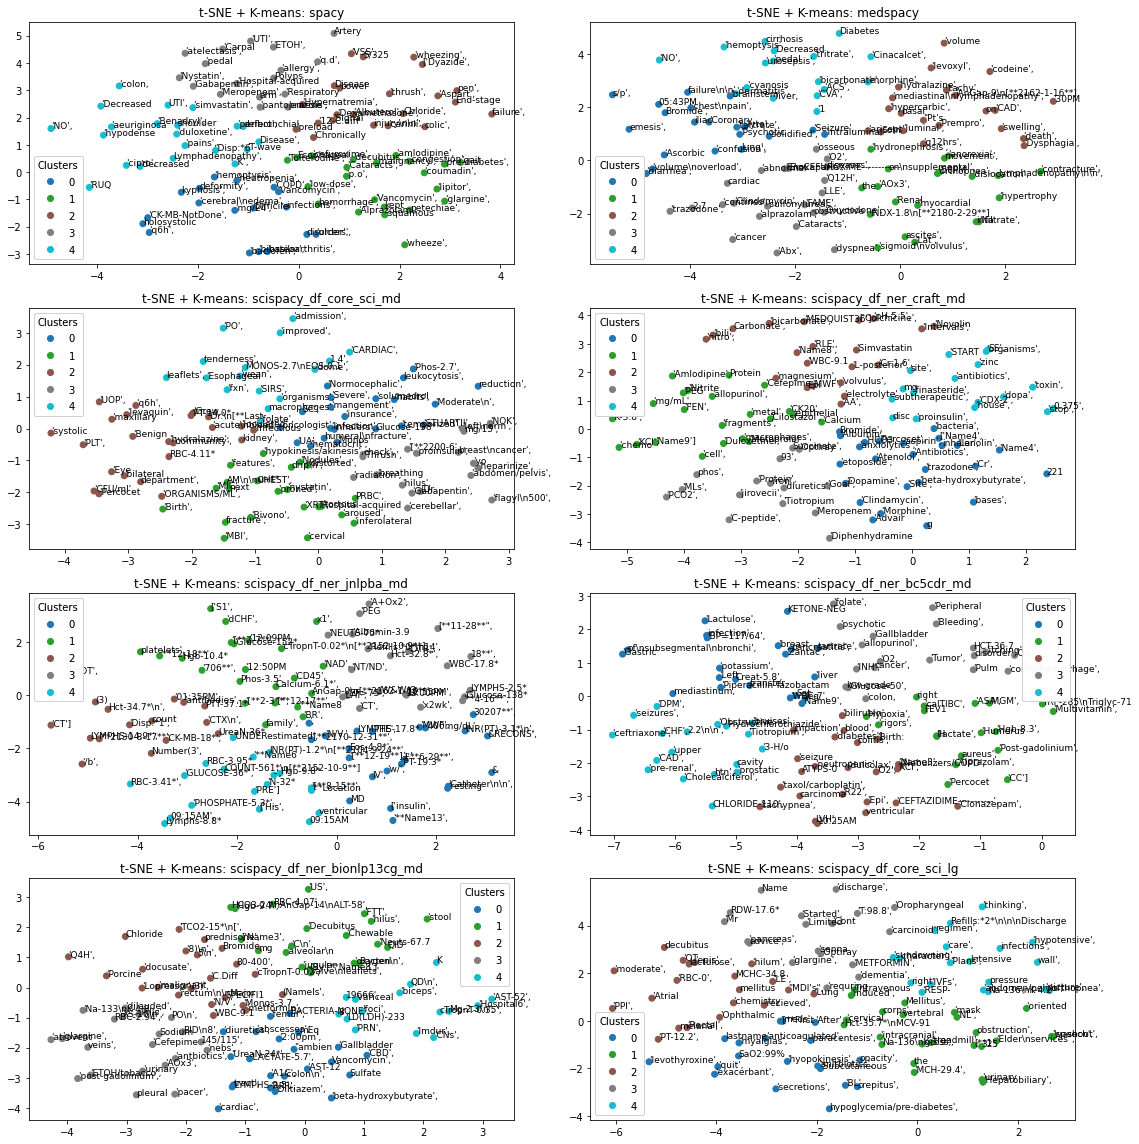

In [79]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random
from sklearn.cluster import KMeans

def plot_tsne(ax, words, model_name, word_vectors, sample_rate=100):
    # Subsample the words
    if len(words) > sample_rate:
        words = random.sample(words, sample_rate)  # Randomly sample words if vocab size is large
    
    word_vecs = np.array([word_vectors[word] for word in words])

    # Perform t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    word_vecs_2d = tsne.fit_transform(word_vecs)

     # Perform K-means clustering on the reduced 2D vectors
    kmeans = KMeans(n_clusters=5, random_state=0).fit(word_vecs_2d)
    cluster_labels = kmeans.labels_

    # Plot the t-SNE result with colors based on K-means clusters
    scatter = ax.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], c=cluster_labels, cmap='tab10')

    # Annotate points
    for i, word in enumerate(words):
        ax.annotate(word, (word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=9)

    # Add a legend for the clusters
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")
    ax.add_artist(legend1)
    
    ax.set_title(f"t-SNE + K-means: {model_name}")
    
    
num_plots = min(len(word_vector_dict), 8)

# Create a 4x2 subplot grid (8 plots)
fig, axes = plt.subplots(4, 2, figsize=(16, 16))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate over the word_vector_dict and plot for each entity
for idx, (entity_name, word_vectors) in enumerate(word_vector_dict.items()):
    if idx >= num_plots:
        break
    # Get word vectors for all unique words in the vocabulary
    words = list(word_vectors.index_to_key)
    plot_tsne(axes[idx], words, entity_name, word_vectors)

plt.tight_layout()
plt.show()


In [ ]:
diagnosis_code = 'Diabetes Mellitus'
filtered_notes = df[(df['category'] == 'Discharge summary') & (df['text'].str.contains(diagnosis_code, case=False))]

In [ ]:
notes = list(df.TEXT.values)

In [ ]:
# corpus = []
# for row in tqdm(range(0, len(df)), desc="Processing rows"):
#     str_tokens = []
#     tokens = nlp(notes[row]).ents
#     for i in range(0, len(tokens)):
#         str_tokens.append(tokens[i].text)
#     corpus.append(list(str_tokens))

In [ ]:
# Initialize S3 client
s3_client = boto3.client('s3')

# Define function to process a batch of rows
def process_chunk(chunk_notes, chunk_id):
    corpus = []
    for row in tqdm(range(len(chunk_notes)), desc=f'Processing chunk {chunk_id}'):
        str_tokens = []
        tokens = nlp(chunk_notes[row]).ents
        for token in tokens:
            str_tokens.append(token.text)
        corpus.append(str_tokens)

    # Save locally
    local_file_path = f'tokens/batch{chunk_id}.csv'
    pd.DataFrame(corpus).to_csv(local_file_path, index=False)

    # Save to S3
    s3_file_path = f'tokens/batch{chunk_id}.csv'
    s3_client.upload_file(local_file_path, bucket_name, s3_file_path)
    
    return chunk_id  # Return chunk ID to confirm completion

# Split the notes list into chunks
num_chunks = 20
chunk_size = len(notes) // num_chunks
chunks = [notes[i:i + chunk_size] for i in range(0, len(notes), chunk_size)]

# Process chunks in parallel and track progress
def process_all_chunks():
    with ThreadPoolExecutor(max_workers=num_chunks) as executor:
        futures = []
        for chunk_id, chunk_notes in enumerate(chunks):
            futures.append(executor.submit(process_chunk, chunk_notes, chunk_id))

        for future in as_completed(futures):
            chunk_id = future.result()
            print(f"Chunk {chunk_id} processing completed.")

# Run the processing
process_all_chunks()